# Clase 2. Curso de Data Science - Análisis de Datos (Data mining)
## Maestría en Estadística Aplicada y Ciencia de Datos - Universidad Tecnológica de Bolivar

### Contenido:
- Limpiando datos: datos faltantes, datos extremos.
- Análisis estadísticos robustos.
- Covarianza y correlación.
- Regresión lineal y lineal múltiple.
- Algunos otros tipos de regresión.

### Dataset para esta lección:
Todos los dataset los vamos a encontrar en la página web https://archive-beta.ics.uci.edu/ de la UC Irvine Machine Learning Repository.

Para tener una mejor idea y dirigirse más rápido a cada uno de los dataset vamos a la página web: http://odds.cs.stonybrook.edu/

# Limpiando datos: Datos faltantes y datos extremos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

El conjunto de datos "student": https://archive-beta.ics.uci.edu/ml/datasets/student+performance

Predict student performance in secondary education (high school). 

In [2]:
data=pd.read_csv("student-mat.csv",delimiter=';')

In [3]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
data1=data.select_dtypes(include='int64')

In [5]:
data1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [6]:
# ¿Cuántos NaN hay?
data[data.isna().any(axis=1)] # Ninguno

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [7]:
length = len(data1)
for i in data1.columns[:-3]:
    num = int(np.random.randint(0,90)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    data1.loc[idx_replace, i] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
data1[data1.isna().any(axis=1)] # Ninguno

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,6,5,0
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7


In [9]:
print("Hay {} datos".format(len(data1)))
for i in data1.columns:
    print("Hay {} ({}%) datos faltantes en la columna {}".format(len(data1[data1[i].isna()]), np.round(len(data1[data1[i].isna()])/len(data1)*100,2), i))

Hay 395 datos
Hay 227 (57.47%) datos faltantes en la columna age
Hay 29 (7.34%) datos faltantes en la columna Medu
Hay 100 (25.32%) datos faltantes en la columna Fedu
Hay 60 (15.19%) datos faltantes en la columna traveltime
Hay 72 (18.23%) datos faltantes en la columna studytime
Hay 166 (42.03%) datos faltantes en la columna failures
Hay 47 (11.9%) datos faltantes en la columna famrel
Hay 115 (29.11%) datos faltantes en la columna freetime
Hay 38 (9.62%) datos faltantes en la columna goout
Hay 154 (38.99%) datos faltantes en la columna Dalc
Hay 23 (5.82%) datos faltantes en la columna Walc
Hay 187 (47.34%) datos faltantes en la columna health
Hay 191 (48.35%) datos faltantes en la columna absences
Hay 0 (0.0%) datos faltantes en la columna G1
Hay 0 (0.0%) datos faltantes en la columna G2
Hay 0 (0.0%) datos faltantes en la columna G3


In [10]:
# Hay una forma más sencilla aún...
data1.isnull().sum()

age           227
Medu           29
Fedu          100
traveltime     60
studytime      72
failures      166
famrel         47
freetime      115
goout          38
Dalc          154
Walc           23
health        187
absences      191
G1              0
G2              0
G3              0
dtype: int64

## Tipos de datos perdidos

1- Datos perdidos completamente al azar (Missing Completely at Random, MCAR):

Missing Completely at Random (MCAR) es bastante sencillo. Lo que significa es lo que dice: la propensión a que un punto de datos falte es completamente aleatoria. No hay ninguna relación entre el hecho de que un punto de datos falte y cualquier valor del conjunto de datos, faltante u observado.

2- Falta no aleatoria (Missing not at random, MNAR):

También conocida como falta de respuesta no asignable, son datos que no son ni MAR ni MCAR (es decir, el valor de la variable que falta está relacionado con la razón por la que falta).

3- Falta al azar (Missing at Random, MAR):

Significa que la propensión a que un punto de datos falte no está relacionada con los datos que faltan, pero sí con algunos de los datos observados. El hecho de que alguien haya respondido al número 13 en su encuesta no tiene nada que ver con los valores que faltan, pero sí con los valores de alguna otra variable.

In [11]:
data1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10


In [12]:
# Por ejemplo:
data2=data1.copy()
data3=data1.copy()
data2["sex"],data2["school"]=data["sex"],data["school"]

In [13]:
data2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex,school
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6,F,GP
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6,F,GP
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10,F,GP
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15,F,GP
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10,F,GP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9,M,MS
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16,M,MS
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7,M,MS
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10,M,MS


In [14]:
np.unique(data2[data2["failures"].isna()]["school"],return_counts=True)

(array(['GP', 'MS'], dtype=object), array([148,  18]))

All the techniques to handle missing values

1. Mean/Median/Mode replacement 
2. Random Sample Imputation 
3. Capturing NAN values with a new feature 
4. End of Distribution Imputation 
5. Arbitrary Imputation 
6. Frequent Categories Imputation

### Imputando data missing

In [15]:
# Podemos crear un par de funciones para imputar

def impute_nan_meanmedian(df, variable, value):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df

In [16]:
impute_nan_random(data1,"goout",1)

<ipython-input-15-df95cd295362>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random_fixed"]=df[variable].fillna(value)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_random_fixed
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6,4.0
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6,3.0
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10,2.0
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15,2.0
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9,4.0
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16,1.0
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7,3.0
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10,1.0


In [17]:
impute_nan_random(data1,"goout",-9)

<ipython-input-15-df95cd295362>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_random_fixed,goout_random
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6,4.0,4.000000
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6,3.0,3.000000
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10,2.0,2.000000
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15,2.0,2.000000
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9,4.0,4.000000
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16,1.0,3.531977
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7,3.0,3.000000
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10,1.0,1.000000


In [18]:
impute_nan_meanmedian(data1,"failures","mean")

<ipython-input-15-df95cd295362>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_"+value]=df[variable].fillna(val)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_random_fixed,goout_random,failures_mean
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6,4.0,4.000000,0.000000
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6,3.0,3.000000,0.366812
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10,2.0,2.000000,3.000000
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15,2.0,2.000000,0.366812
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10,2.0,2.000000,0.366812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9,4.0,4.000000,0.366812
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16,1.0,3.531977,0.000000
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7,3.0,3.000000,3.000000
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10,1.0,1.000000,0.366812


In [19]:
impute_nan_meanmedian(data1,"goout","median")

<ipython-input-15-df95cd295362>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_"+value]=df[variable].fillna(val)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,goout_random_fixed,goout_random,failures_mean,goout_median
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,1.0,NaN,NaN,5,6,6,4.0,4.000000,0.000000,4.0
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,1.0,NaN,NaN,5,5,6,3.0,3.000000,0.366812,3.0
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,3.0,3.0,NaN,7,8,10,2.0,2.000000,3.000000,2.0
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,1.0,5.0,NaN,15,14,15,2.0,2.000000,0.366812,2.0
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,2.0,NaN,4.0,6,10,10,2.0,2.000000,0.366812,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,5.0,4.0,11.0,9,9,9,4.0,4.000000,0.366812,4.0
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,14,16,16,1.0,3.531977,0.000000,3.0
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,3.0,3.0,NaN,10,8,7,3.0,3.000000,3.000000,3.0
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,4.0,NaN,NaN,11,12,10,1.0,1.000000,0.366812,1.0


In [20]:
impute_nan_meanmedian(data1,"goout","mean")

<ipython-input-15-df95cd295362>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_"+value]=df[variable].fillna(val)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,health,absences,G1,G2,G3,goout_random_fixed,goout_random,failures_mean,goout_median,goout_mean
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,...,NaN,NaN,5,6,6,4.0,4.000000,0.000000,4.0,4.000000
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,...,NaN,NaN,5,5,6,3.0,3.000000,0.366812,3.0,3.000000
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,...,3.0,NaN,7,8,10,2.0,2.000000,3.000000,2.0,2.000000
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,...,5.0,NaN,15,14,15,2.0,2.000000,0.366812,2.0,2.000000
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,...,NaN,4.0,6,10,10,2.0,2.000000,0.366812,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,...,4.0,11.0,9,9,9,4.0,4.000000,0.366812,4.0,4.000000
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,...,NaN,NaN,14,16,16,1.0,3.531977,0.000000,3.0,3.095238
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,...,3.0,NaN,10,8,7,3.0,3.000000,3.000000,3.0,3.000000
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,...,NaN,NaN,11,12,10,1.0,1.000000,0.366812,1.0,1.000000


In [21]:
data1[data1.isna().any(axis=1)] # Ninguno

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,health,absences,G1,G2,G3,goout_random_fixed,goout_random,failures_mean,goout_median,goout_mean
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,...,NaN,NaN,5,6,6,4.0,4.000000,0.000000,4.0,4.000000
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,...,NaN,NaN,5,5,6,3.0,3.000000,0.366812,3.0,3.000000
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,...,3.0,NaN,7,8,10,2.0,2.000000,3.000000,2.0,2.000000
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,...,5.0,NaN,15,14,15,2.0,2.000000,0.366812,2.0,2.000000
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,...,NaN,4.0,6,10,10,2.0,2.000000,0.366812,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,0.0,6,5,0,1.0,1.000000,1.000000,1.0,1.000000
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,...,4.0,11.0,9,9,9,4.0,4.000000,0.366812,4.0,4.000000
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,...,NaN,NaN,14,16,16,1.0,3.531977,0.000000,3.0,3.095238
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,...,3.0,NaN,10,8,7,3.0,3.000000,3.000000,3.0,3.000000


### O podemos usar KNN

Graphically | Pseudocode
- | - 
<img src="knn2.jpg" alt="Drawing" style="width: 600px;"/> | <img src="PMC3918356_CMMM2014-276589.alg.001.png" alt="Drawing" style="width: 800px;"/>

In [22]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data3)
# transform the dataset
Xtrans = imputer.transform(data3)

In [23]:
Xtrans

array([[18. ,  4. ,  4. , ...,  5. ,  6. ,  6. ],
       [17. ,  1. ,  2.4, ...,  5. ,  5. ,  6. ],
       [17.2,  1. ,  1. , ...,  7. ,  8. , 10. ],
       ...,
       [17.2,  1. ,  1. , ..., 10. ,  8. ,  7. ],
       [18. ,  3. ,  2. , ..., 11. , 12. , 10. ],
       [19. ,  1. ,  1. , ...,  8. ,  9. ,  9. ]])

In [24]:
Xtrans=pd.DataFrame(Xtrans,columns=data3.columns)

In [25]:
Xtrans

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.8,4.0,1.0,1.0,4.2,9.2,5.0,6.0,6.0
1,17.0,1.0,2.4,1.0,2.0,0.0,5.0,3.0,3.0,1.2,1.0,3.6,11.6,5.0,5.0,6.0
2,17.2,1.0,1.0,1.0,2.0,3.0,4.0,3.4,2.0,1.0,3.0,3.0,3.0,7.0,8.0,10.0
3,16.4,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.2,1.0,5.0,1.2,15.0,14.0,15.0
4,16.0,3.0,3.0,1.0,2.0,0.4,4.0,3.0,2.0,1.0,2.0,3.8,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,1.8,1.6,2.0,0.4,4.4,5.0,4.0,2.0,5.0,4.0,11.0,9.0,9.0,9.0
391,15.6,3.0,1.0,2.0,1.0,0.0,2.0,4.0,3.0,1.6,4.0,3.0,2.0,14.0,16.0,16.0
392,17.2,1.0,1.0,1.0,1.0,3.0,5.0,3.2,3.0,1.8,3.0,3.0,7.0,10.0,8.0,7.0
393,18.0,3.0,2.0,3.0,2.2,0.6,4.0,3.2,1.0,3.0,4.0,3.8,1.8,11.0,12.0,10.0


# Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. 

No handles with labels found to put in legend.


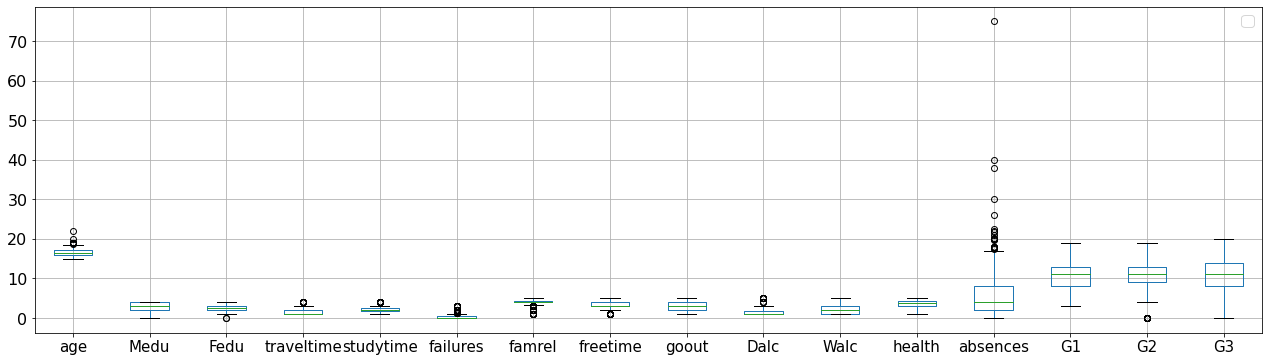

In [26]:
plt.figure(figsize=(22,6))
Xtrans.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Prueba de Grubbs

El test de Grubbs (llamado así por Frank E. Grubbs, que publicó el test en 1950), también conocido como test del residuo máximo normalizado o test de la desviación estudiantil extrema, es un test utilizado para detectar valores atípicos en un conjunto de datos univariantes que se supone que provienen de una población normalmente distribuida.

La prueba de Grubbs se basa en el supuesto de normalidad. Es decir, antes de aplicar la prueba de Grubbs se debe verificar que los datos pueden ser razonablemente aproximados por una distribución normal.

La prueba de Grubbs detecta un valor atípico cada vez. Este valor atípico se elimina del conjunto de datos y la prueba se repite hasta que no se detectan valores atípicos. Sin embargo, las iteraciones múltiples cambian las probabilidades de detección, y la prueba no debería utilizarse para tamaños de muestra de seis o menos, ya que suele marcar la mayoría de los puntos como valores atípicos.

La prueba es muy parecida a la de Chauvenet como en la sección anterior pero usa una nueva distribución y además un ligero cambio en el estadístico de prueba. El estadístico de la prueba de Grubbs se define como: 
\begin{equation}
G_{max}=\frac{\mbox{max}_{i=1}^N|x-\bar x|}{s_x},
\end{equation}
donde $G_{max}$ es la desviación máxima permitida, $|\cdot |$ es el valor absoluto, $x$ es el valor del presunto valor atípico, $\bar x$ es la media de la muestra, y $s_x$ es la desviación estándar de la muestra.

Entonces se propone una prueba estadística de hipótesis de dos caras, para la que se rechaza la hipótesis de ausencia de valores atípicos al nivel de significación $\alpha$ si 
\begin{equation}
G_{max}>\frac{N-1}{N}\sqrt{\frac{t^2_{\alpha/(2N),N-2}}{N-2+t^2_{\alpha/(2N),N-2}}},
\end{equation}
con $t^2_{\alpha/(2N),N-2}$ denotando el valor crítico superior de la distribución $t$ con $N-2$ grados de libertad y un nivel de significación de $\alpha/(2N)$. 

In [27]:
import scipy.stats as st

alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6)
print("t_test es = {} para n={} observaciones con una significancia de {}".format(cv,len(Xtrans["absences"]),alpha))

t_test es = 2.4469118487916806 para n=395 observaciones con una significancia de 0.05


In [28]:
print("La media es =",Xtrans["absences"].mean())
print("La desviación estándar es =",Xtrans["absences"].std())
# El z-score para todos los datos es:
G=np.max(abs(Xtrans["absences"]-Xtrans["absences"].mean())/Xtrans["absences"].std())
G

La media es = 5.854177215189874
La desviación estándar es = 6.720542152334657


10.288726893973795

In [29]:
Gi=abs(Xtrans["absences"]-Xtrans["absences"].mean())/Xtrans["absences"].std()
Gi[Gi==Gi.max()]

276    10.288727
Name: absences, dtype: float64

In [30]:
print("El estadístico de prueba es",Gi.max(), "o sea el dato de la fila", Gi[Gi==Gi.max()])

El estadístico de prueba es 10.288726893973795 o sea el dato de la fila 276    10.288727
Name: absences, dtype: float64


In [31]:
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")

El valor es un extremo


In [32]:
Xtrans2=Xtrans.drop([183],axis=0)
Xtrans2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.8,4.0,1.0,1.0,4.2,9.2,5.0,6.0,6.0
1,17.0,1.0,2.4,1.0,2.0,0.0,5.0,3.0,3.0,1.2,1.0,3.6,11.6,5.0,5.0,6.0
2,17.2,1.0,1.0,1.0,2.0,3.0,4.0,3.4,2.0,1.0,3.0,3.0,3.0,7.0,8.0,10.0
3,16.4,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.2,1.0,5.0,1.2,15.0,14.0,15.0
4,16.0,3.0,3.0,1.0,2.0,0.4,4.0,3.0,2.0,1.0,2.0,3.8,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,1.8,1.6,2.0,0.4,4.4,5.0,4.0,2.0,5.0,4.0,11.0,9.0,9.0,9.0
391,15.6,3.0,1.0,2.0,1.0,0.0,2.0,4.0,3.0,1.6,4.0,3.0,2.0,14.0,16.0,16.0
392,17.2,1.0,1.0,1.0,1.0,3.0,5.0,3.2,3.0,1.8,3.0,3.0,7.0,10.0,8.0,7.0
393,18.0,3.0,2.0,3.0,2.2,0.6,4.0,3.2,1.0,3.0,4.0,3.8,1.8,11.0,12.0,10.0


## Some plots

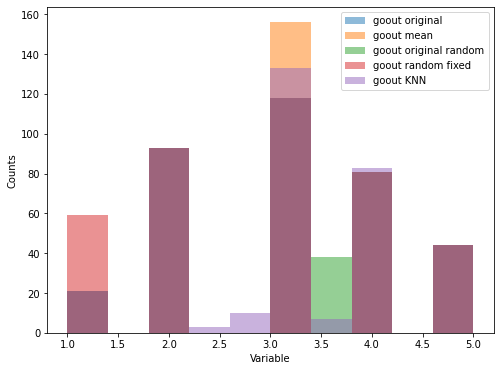

In [33]:
plt.figure(figsize=(8,6))
bins=10
plt.hist(data1["goout"],bins=bins,alpha=0.5,label="goout original")
plt.hist(data1["goout_mean"],bins=bins,alpha=0.5,label="goout mean")
plt.hist(data1["goout_random"],bins=bins,alpha=0.5,label="goout original random")
plt.hist(data1["goout_random_fixed"],bins=bins,alpha=0.5,label="goout random fixed")
plt.hist(Xtrans2["goout"],bins=bins,alpha=0.5,label="goout KNN")
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [34]:
impute_nan_random(data1,"age",18)
impute_nan_random(data1,"age",-9)
impute_nan_meanmedian(data1,"age","mean")
impute_nan_meanmedian(data1,"age","median")

<ipython-input-15-df95cd295362>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random_fixed"]=df[variable].fillna(value)
<ipython-input-15-df95cd295362>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
<ipython-input-15-df95cd295362>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G3,goout_random_fixed,goout_random,failures_mean,goout_median,goout_mean,age_random_fixed,age_random,age_mean,age_median
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,NaN,4.0,NaN,...,6,4.0,4.000000,0.000000,4.0,4.000000,18.0,18.000000,18.000000,18.0
1,17.0,1.0,NaN,1.0,2.0,NaN,5.0,3.0,3.0,NaN,...,6,3.0,3.000000,0.366812,3.0,3.000000,17.0,17.000000,17.000000,17.0
2,NaN,1.0,1.0,1.0,2.0,3.0,4.0,NaN,2.0,NaN,...,10,2.0,2.000000,3.000000,2.0,2.000000,18.0,21.164303,16.636905,17.0
3,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,2.0,NaN,...,15,2.0,2.000000,0.366812,2.0,2.000000,18.0,21.164303,16.636905,17.0
4,16.0,3.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,1.0,...,10,2.0,2.000000,0.366812,2.0,2.000000,16.0,16.000000,16.000000,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,NaN,...,9,4.0,4.000000,0.366812,4.0,4.000000,20.0,20.000000,20.000000,20.0
391,NaN,3.0,1.0,2.0,1.0,0.0,2.0,4.0,NaN,NaN,...,16,1.0,3.531977,0.000000,3.0,3.095238,18.0,21.164303,16.636905,17.0
392,NaN,1.0,1.0,1.0,1.0,3.0,5.0,NaN,3.0,NaN,...,7,3.0,3.000000,3.000000,3.0,3.000000,18.0,21.164303,16.636905,17.0
393,18.0,3.0,2.0,3.0,NaN,NaN,4.0,NaN,1.0,3.0,...,10,1.0,1.000000,0.366812,1.0,1.000000,18.0,18.000000,18.000000,18.0


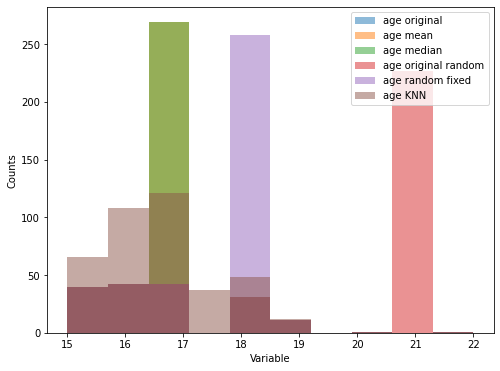

In [35]:
plt.figure(figsize=(8,6))
bins=10
plt.hist(data1["age"],bins=bins,alpha=0.5,label="age original")
plt.hist(data1["age_mean"],bins=bins,alpha=0.5,label="age mean")
plt.hist(data1["age_median"],bins=bins,alpha=0.5,label="age median")
plt.hist(data1["age_random"],bins=bins,alpha=0.5,label="age original random")
plt.hist(data1["age_random_fixed"],bins=bins,alpha=0.5,label="age random fixed")
plt.hist(Xtrans2["age"],bins=bins,alpha=0.5,label="age KNN")
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.legend()
plt.show()